In [1]:
##Revannath Jondhale

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [15]:
import statsmodels.api as sm

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES

In [9]:
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots

In [12]:
import statsmodels.tsa.statespace as tm_models

In [13]:
from datetime import datetime,time

In [14]:
airlines = pd.read_excel("Airlines+Data.xlsx")

In [16]:
print(airlines)

        Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]


In [17]:
airlines.columns

Index(['Month', 'Passengers'], dtype='object')

In [19]:
# convert the normal index  airlines dataset to to times stamp

In [20]:
airlines.index = pd.to_datetime(airlines.Month,format="%b-%y")

In [21]:
print(airlines)

                Month  Passengers
Month                            
1995-01-01 1995-01-01         112
1995-02-01 1995-02-01         118
1995-03-01 1995-03-01         132
1995-04-01 1995-04-01         129
1995-05-01 1995-05-01         121
...               ...         ...
2002-08-01 2002-08-01         405
2002-09-01 2002-09-01         355
2002-10-01 2002-10-01         306
2002-11-01 2002-11-01         271
2002-12-01 2002-12-01         306

[96 rows x 2 columns]


<AxesSubplot:xlabel='Month'>

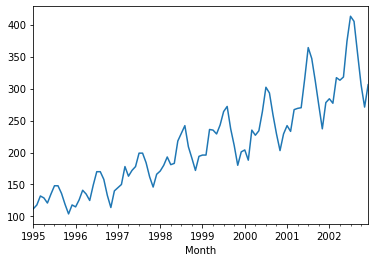

In [22]:
airlines.Passengers.plot()## plotting

In [23]:
airlines.head(12)

,Month,Passengers
Month,,
1995-01-01,1995-01-01,112
1995-02-01,1995-02-01,118
1995-03-01,1995-03-01,132
1995-04-01,1995-04-01,129
1995-05-01,1995-05-01,121
1995-06-01,1995-06-01,135
1995-07-01,1995-07-01,148
1995-08-01,1995-08-01,148
1995-09-01,1995-09-01,136


In [24]:
# create Date column to store the actual date format for the given month

In [25]:
airlines['Date'] = pd.to_datetime(airlines.Month, format = "%b-%y")

In [26]:
print(airlines)

                Month  Passengers       Date
Month                                       
1995-01-01 1995-01-01         112 1995-01-01
1995-02-01 1995-02-01         118 1995-02-01
1995-03-01 1995-03-01         132 1995-03-01
1995-04-01 1995-04-01         129 1995-04-01
1995-05-01 1995-05-01         121 1995-05-01
...               ...         ...        ...
2002-08-01 2002-08-01         405 2002-08-01
2002-09-01 2002-09-01         355 2002-09-01
2002-10-01 2002-10-01         306 2002-10-01
2002-11-01 2002-11-01         271 2002-11-01
2002-12-01 2002-12-01         306 2002-12-01

[96 rows x 3 columns]


In [27]:
# Extracting Day, Weekday name, month name, year from the date column using Date functions from pandas

In [28]:
airlines["month"] = airlines.Date.dt.strftime("%b")

In [29]:
airlines

,Month,Passengers,Date,month
Month,,,,
1995-01-01,1995-01-01,112,1995-01-01,Jan
1995-02-01,1995-02-01,118,1995-02-01,Feb
1995-03-01,1995-03-01,132,1995-03-01,Mar
1995-04-01,1995-04-01,129,1995-04-01,Apr
1995-05-01,1995-05-01,121,1995-05-01,May
...,...,...,...,...
2002-08-01,2002-08-01,405,2002-08-01,Aug
2002-09-01,2002-09-01,355,2002-09-01,Sep
2002-10-01,2002-10-01,306,2002-10-01,Oct


In [30]:
airlines["year"] = airlines.Date.dt.strftime("%y")

In [31]:
airlines

,Month,Passengers,Date,month,year
Month,,,,,
1995-01-01,1995-01-01,112,1995-01-01,Jan,95
1995-02-01,1995-02-01,118,1995-02-01,Feb,95
1995-03-01,1995-03-01,132,1995-03-01,Mar,95
1995-04-01,1995-04-01,129,1995-04-01,Apr,95
1995-05-01,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
2002-08-01,2002-08-01,405,2002-08-01,Aug,02
2002-09-01,2002-09-01,355,2002-09-01,Sep,02
2002-10-01,2002-10-01,306,2002-10-01,Oct,02


In [32]:
# Heat map visulization

In [33]:
heatmap_year_month = pd.pivot_table(data=airlines, values="Passengers",index = "year", columns= "month",aggfunc = "mean", fill_value=0)

<AxesSubplot:xlabel='month', ylabel='year'>

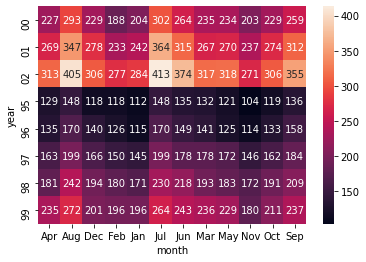

In [34]:
sns.heatmap(heatmap_year_month,annot=True,fmt="g")## cheking for heat map

In [35]:
# Boxplot for all the data

<AxesSubplot:xlabel='month', ylabel='Passengers'>

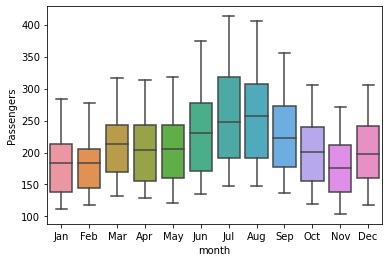

In [36]:
sns.boxplot(x="month",y="Passengers",data=airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

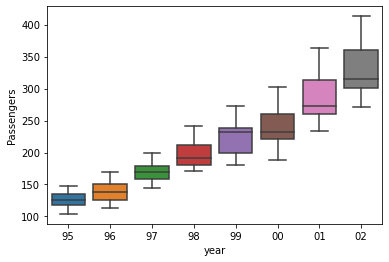

In [37]:
sns.boxplot(x="year",y = "Passengers",data=airlines)

In [38]:
# Line plot for plane passengers based on year and for each month

<AxesSubplot:xlabel='year', ylabel='Passengers'>

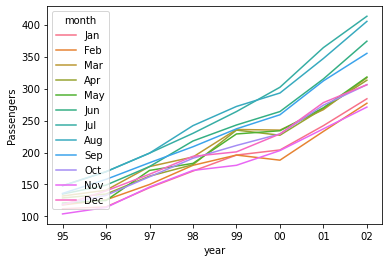

In [39]:
sns.lineplot(x="year",y="Passengers",hue = "month",data=airlines)

In [40]:
# Lets see the moving average for the time series to understand better about the trend character in airlines

<AxesSubplot:xlabel='Month'>

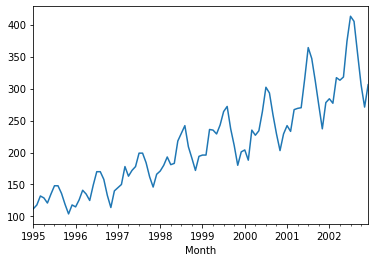

In [41]:
airlines.Passengers.plot(label="org")

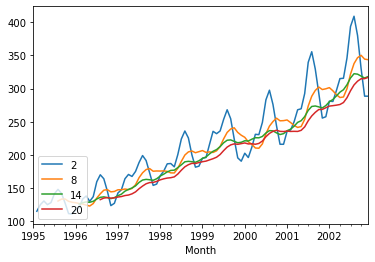

In [42]:
for i in range(2,24,6):
  airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [43]:
##time composition plotting asp er the below

In [44]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,model="additive")

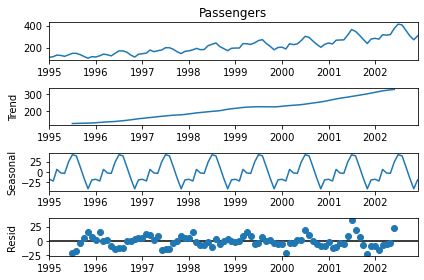

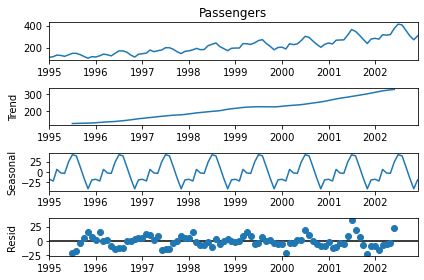

In [45]:
decompose_ts_add.plot()

In [46]:
# Decomposition plot for multiplicative seasonality

In [47]:
decompose_ts_mul = seasonal_decompose(airlines.Passengers,model = "multiplicative")

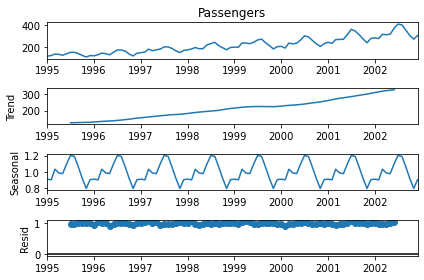

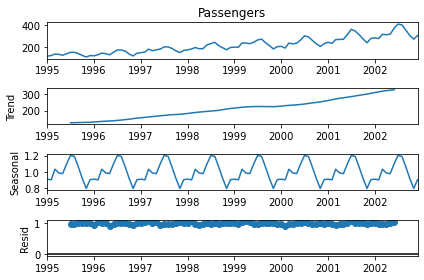

In [48]:
decompose_ts_mul.plot()

In [49]:
# ACF plots and PACF plots on the original data sets

In [50]:
# ACF plot

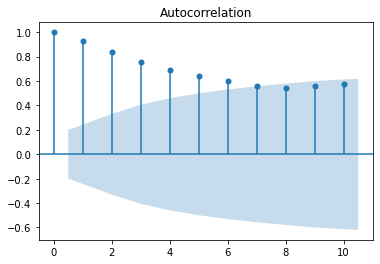

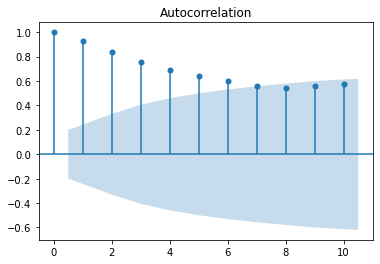

In [51]:
tsa_plots.plot_acf(airlines.Passengers,lags=10)## Autocorrelation plotting

In [52]:
# PACF plot

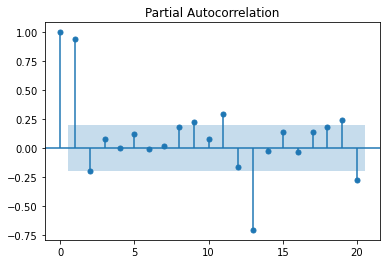

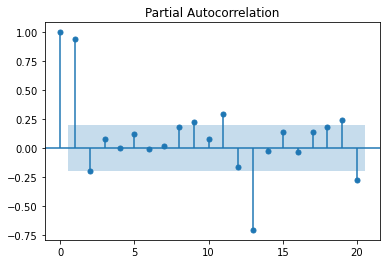

In [53]:
tsa_plots.plot_pacf(airlines.Passengers)##partial autocorrelation

In [54]:
len(airlines)

96

In [55]:
train = airlines.head(84)

In [56]:
test = airlines.tail(12)

In [57]:
test,train

(                Month  Passengers       Date month year
 Month                                                  
 2002-01-01 2002-01-01         284 2002-01-01   Jan   02
 2002-02-01 2002-02-01         277 2002-02-01   Feb   02
 2002-03-01 2002-03-01         317 2002-03-01   Mar   02
 2002-04-01 2002-04-01         313 2002-04-01   Apr   02
 2002-05-01 2002-05-01         318 2002-05-01   May   02
 2002-06-01 2002-06-01         374 2002-06-01   Jun   02
 2002-07-01 2002-07-01         413 2002-07-01   Jul   02
 2002-08-01 2002-08-01         405 2002-08-01   Aug   02
 2002-09-01 2002-09-01         355 2002-09-01   Sep   02
 2002-10-01 2002-10-01         306 2002-10-01   Oct   02
 2002-11-01 2002-11-01         271 2002-11-01   Nov   02
 2002-12-01 2002-12-01         306 2002-12-01   Dec   02,
                 Month  Passengers       Date month year
 Month                                                  
 1995-01-01 1995-01-01         112 1995-01-01   Jan   95
 1995-02-01 1995-02-01        

In [58]:
test

,Month,Passengers,Date,month,year
Month,,,,,
2002-01-01,2002-01-01,284,2002-01-01,Jan,02
2002-02-01,2002-02-01,277,2002-02-01,Feb,02
2002-03-01,2002-03-01,317,2002-03-01,Mar,02
2002-04-01,2002-04-01,313,2002-04-01,Apr,02
2002-05-01,2002-05-01,318,2002-05-01,May,02
2002-06-01,2002-06-01,374,2002-06-01,Jun,02
2002-07-01,2002-07-01,413,2002-07-01,Jul,02
2002-08-01,2002-08-01,405,2002-08-01,Aug,02
2002-09-01,2002-09-01,355,2002-09-01,Sep,02


In [59]:
def MAPE(pred,org):
  temp = np.abs((pred-org))*100/org
  return np.mean(temp)

In [60]:
# Simple Exponential Method

In [61]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [62]:
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])

In [63]:
mape_ses = MAPE(pred_ses,test.Passengers)

In [64]:
print(MAPE(pred_ses,test.Passengers))

14.23543315462988


In [65]:
# Holt method

In [66]:
hw_model = Holt(train["Passengers"]).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [67]:
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])

In [68]:
mape_hw = MAPE(pred_hw,test.Passengers)

In [69]:
print(MAPE(pred_hw,test.Passengers))

11.885522842737595


In [70]:
# Holts winter exponential smoothing with additive seasonality and additive trend

In [71]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal = "add",trend = "add", seasonal_periods = 12, damped = True).fit()

<ipython-input-71-5b526a75ae76>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal = "add",trend = "add", seasonal_periods = 12, damped = True).fit()
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [72]:
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

In [73]:
mape_hwe_add_add = MAPE(pred_hwe_add_add,test.Passengers)

In [74]:
print(MAPE(pred_hwe_add_add,test.Passengers))

3.9136743689273406


In [75]:
# Holts winter exponential smoothing with miltiplicative seasonality and additive trend

In [76]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods = 12).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [77]:
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

In [78]:
mape_hwe_mul_add = MAPE(pred_hwe_mul_add,test.Passengers)

In [79]:
MAPE(pred_hwe_mul_add,test.Passengers)

2.820719538812041

In [81]:
!pip install pmdarima

In [84]:
!pip install pmdarima

In [82]:
# Let's use auto_arima and install the packages for the same

In [83]:
import pmdarima as pm

In [85]:
from pmdarima import model_selection

In [86]:
auto_arima_model = pm.auto_arima(train["Passengers"],start_p= 0,start_q = 0,max_p = 10,max_q = 10,m=12,start_P = 0,seasonal = True,d=1,D=1,trace = True,error_action= "ignore",supress_warnigs=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=536.198, Time=3.43 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=533.081, Time=0.82 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=534.832, Time=0.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=533.128, Time=0.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=534.950, Time=0.26 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=534.789, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=533.591, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=531.484, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=532.519, Time=0.55 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=531.004, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=533.002, Time=0.28 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.31 sec
 ARIMA(0,1,1)(2,1,0)[12]  

In [87]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   84
Model:             SARIMAX(0, 1, 3)x(1, 1, [], 12)   Log Likelihood                -260.238
Date:                             Sat, 30 Oct 2021   AIC                            530.476
Time:                                     14:45:43   BIC                            541.789
Sample:                                          0   HQIC                           534.975
                                              - 84                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2709      0.124     -2.186      0.029      -0.514      -0.028
ma.L2          0.0498      0.145      0.343      0.732      -0.235       0.334
ma.L3         -0.2590      0.145     -1.785      0.074      -0.543       0.025
ar.S.L12      -0.2329      0.122     -1.913      0.056      -0.472       0.006
sigma2        88.1575     15.740      5.601      0.000      57.308     119.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.96   Prob(JB):                         0.51
Heteroskedasticity (H):               2.57   Skew:                             0.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
auto_arima_model.predict_in_sample()

array([  0.        , 111.99844813, 118.00045967, 131.9983274 ,
       129.00009469, 120.99985026, 134.99959501, 147.99998934,
       147.99980738, 136.00033356, 119.0002249 , 104.00093982,
       174.00148179, 121.00367303, 138.69847682, 137.95241334,
       126.69489276, 138.73784253, 159.8803426 , 168.24172487,
       155.39216007, 137.77522852, 119.34138545, 128.6559998 ,
       135.1675863 , 154.15310823, 163.57539413, 166.17053619,
       156.10557372, 185.48892209, 200.7793436 , 194.99711975,
       187.76592324, 162.54354671, 142.85499157, 169.3011275 ,
       170.32835272, 176.23678657, 204.8408272 , 183.31770708,
       184.63883206, 196.58757897, 233.71716948, 232.49702303,
       219.39383304, 190.55287953, 171.20192297, 195.89520313,
       199.43740916, 204.69869516, 215.17030141, 218.11498224,
       237.34474735, 254.95233392, 255.54663895, 272.48097162,
       246.83871405, 218.52094591, 194.37145964, 207.60169114,
       206.7199969 , 210.22647826, 229.30768648, 229.49

In [89]:
auto_arima_pred_test = pd.Series(auto_arima_model.predict(n_periods=12))

In [90]:
auto_arima_pred_test

0     285.244292
1     278.463824
2     312.094633
3     311.765493
4     314.162977
5     355.669267
6     402.107213
7     386.970525
8     352.203439
9     316.066751
10    281.628805
11    319.135095
dtype: float64

In [91]:
test

,Month,Passengers,Date,month,year
Month,,,,,
2002-01-01,2002-01-01,284,2002-01-01,Jan,02
2002-02-01,2002-02-01,277,2002-02-01,Feb,02
2002-03-01,2002-03-01,317,2002-03-01,Mar,02
2002-04-01,2002-04-01,313,2002-04-01,Apr,02
2002-05-01,2002-05-01,318,2002-05-01,May,02
2002-06-01,2002-06-01,374,2002-06-01,Jun,02
2002-07-01,2002-07-01,413,2002-07-01,Jul,02
2002-08-01,2002-08-01,405,2002-08-01,Aug,02
2002-09-01,2002-09-01,355,2002-09-01,Sep,02


In [92]:
auto_arima_pred_test.index = test.index

In [93]:
mape_auto_arima_model = MAPE(auto_arima_pred_test,test.Passengers)

In [116]:
MAPE(pred_test,test.Passengers)

TypeError: MAPE() missing 1 required positional argument: 'org'

In [95]:
from itertools import product

In [96]:
combinations_l = list(product(range(1,7),range(2),(1,9)))

In [97]:
combinations_u = list(product(range(1,7),range(2),(1,9)))

In [98]:
print(combinations_l)

[(1, 0, 1), (1, 0, 9), (1, 1, 1), (1, 1, 9), (2, 0, 1), (2, 0, 9), (2, 1, 1), (2, 1, 9), (3, 0, 1), (3, 0, 9), (3, 1, 1), (3, 1, 9), (4, 0, 1), (4, 0, 9), (4, 1, 1), (4, 1, 9), (5, 0, 1), (5, 0, 9), (5, 1, 1), (5, 1, 9), (6, 0, 1), (6, 0, 9), (6, 1, 1), (6, 1, 9)]


In [99]:
len(combinations_l)

24

In [100]:
print(combinations_u)

[(1, 0, 1), (1, 0, 9), (1, 1, 1), (1, 1, 9), (2, 0, 1), (2, 0, 9), (2, 1, 1), (2, 1, 9), (3, 0, 1), (3, 0, 9), (3, 1, 1), (3, 1, 9), (4, 0, 1), (4, 0, 9), (4, 1, 1), (4, 1, 9), (5, 0, 1), (5, 0, 9), (5, 1, 1), (5, 1, 9), (6, 0, 1), (6, 0, 9), (6, 1, 1), (6, 1, 9)]


In [101]:
len(combinations_u)

24

In [102]:
import warnings

In [103]:
warnings.filterwarnings("ignore")

In [104]:
best_fit_model = sm.tsa.statespace.SARIMAX(train["Passengers"],order = (1,1,1),seasonal_order = (1,1,1,12)).fit(disp=-1) # disp = -1 helps to neglect the errors.

In [105]:
best_fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -262.346
Date:                            Sat, 30 Oct 2021   AIC                            534.691
Time:                                    14:47:29   BIC                            546.005
Sample:                                01-01-1995   HQIC                           539.190
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6310      0.373     -1.692      0.091      -1.362       0.100
ma.L1          0.4287      0.405      1.059      0.289      -0.364       1.222
ar.S.L12      -0.2772      0.554     -0.500      0.617      -1.363       0.809
ma.S.L12       0.0361      0.630      0.057      0.954      -1.199       1.271
sigma2        93.7524     17.521      5.351      0.000      59.411     128.094
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.85   Prob(JB):                         0.36
Heteroskedasticity (H):               2.57   Skew:                             0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
best_fit_model.aic

534.6911586205581

In [107]:
sarima_pred = best_fit_model.predict(start = test.index[0],end = test.index[-1])

In [108]:
airlines["sarima_pred"] = sarima_pred

In [109]:
sarima_pred

2002-01-01    284.893730
2002-02-01    276.406835
2002-03-01    312.119131
2002-04-01    312.573999
2002-05-01    314.549123
2002-06-01    356.448436
2002-07-01    402.706793
2002-08-01    387.637147
2002-09-01    352.794314
2002-10-01    316.750083
2002-11-01    282.412939
2002-12-01    319.862813
Freq: MS, Name: predicted_mean, dtype: float64

In [110]:
mape_sarima = MAPE(sarima_pred,test.Passengers)

In [111]:
mape_sarima

2.3031956505131235

In [112]:
MAPE_Table ={"MODLE" : pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_mul","auto_arima_model","sarima_model"]),
             "MAPE": pd.Series([mape_ses,mape_hw,mape_hwe_add_add,mape_hwe_mul_add,mape_auto_arima_model,mape_sarima])}

In [113]:
MAPE_Table

{'MODLE': 0            ses_model
 1             hw_model
 2    hwe_model_add_add
 3    hwe_model_mul_mul
 4     auto_arima_model
 5         sarima_model
 dtype: object,
 'MAPE': 0    14.235433
 1    11.885523
 2     3.913674
 3     2.820720
 4     2.366470
 5     2.303196
 dtype: float64}

In [114]:
Best_model_comparison_table = pd.DataFrame(MAPE_Table)

In [115]:
Best_model_comparison_table

,MODLE,MAPE
0,ses_model,14.235433
1,hw_model,11.885523
2,hwe_model_add_add,3.913674
3,hwe_model_mul_mul,2.820720
4,auto_arima_model,2.366470
5,sarima_model,2.303196


In [117]:
##table we can say that the "Holt's Winter Exponential Model with Additive Seasonality and Additive Trend" is giving MAPE

In [118]:
##i.e. Error. So we will use this model for the prediction and forecasting of the similar data in future.